Running WaveStats Algorithm:
Extracting data from file...
Finished computing the time_offset array.
Finished computing the acc array.
Algorithm Successful.


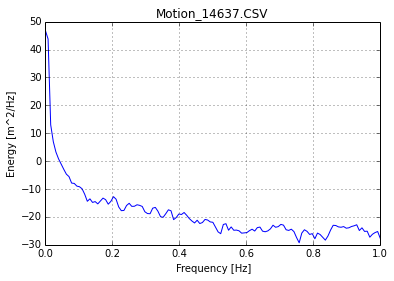

In [4]:
#Purisa Jasmine Simmons
#July 6, 2018
#An algorithm for generating a Power Spectral Density Plot from 
#accelerometer data that has been converted to displacement.

#Overview of Algorithm:
#1. Returns the Power Spectral Density Plot

#Data Units:
#acceleration is measured in g, 500a = 1g = -9.81m/s^2
#displacement measured in m
#time measured in seconds

%matplotlib inline

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

from plotly import tools
import plotly.offline
import plotly.graph_objs as go

import math
import re

#Need to do peak-picking before algorithm runs:
#1. Read through file, save all times and accelerations:
print('Running WaveStats Algorithm:')

#Reading data from filename_r
filename_r = "Motion_14637.CSV"
read_file = open(filename_r, "r")

#Initialize lists
t1 = 0 
t2 = 0
time_e_list = []  #list of ***elapsed*** times
time_o_list = []  #list of ***offset*** times
acc_list = []     #list of estimated accelerations
disp_list = []    #list of estimated displacements

print 'Extracting data from file...'
with open(filename_r, 'r') as f: 
  for line in f:
    str_array = line.split(',')  #separates each line into an array on commas

    #-------Calculating Time Offset--------#
    if str_array[0] == "UTC":
      t1 = 0
      t2 = 0
      time_e_list.append(0)
      time_o_list.append(0)

    else:
      t2 = str_array[0]

      if (t2 != 0 and t1 != 0 and str_array[2] != "N/A"):
        time_regex = r"(\.\d+)"
        t2_val = float(re.search(time_regex, t2).group(1))
        t1_val = float(re.search(time_regex, t1).group(1))

        #print t2_val
        #print t1_val

        t_out = t2_val - t1_val #measured in secs

        #t_out is the time offset between two subsequent samples
        if (t_out < 0): 
          t_out = t_out + 1

        #print ("Printing time_offsets")
     
        last = len(time_e_list) - 1
        last_time = time_e_list[last] 
        new_time = t_out + last_time  #new_time is the total elapsed time

        time_e_list.append(new_time)
        time_o_list.append(t_out)

      if (str_array[2] != "N/A" and str_array[3] != "N/A" and \
        str_array[4] != "N/A" and str_array[2] != "IMU A1"):

        g_const = 512     #g_const is scaling constant: 500 (500raw units = 1g)
        gravity = -9.80665 #gravity is the constant 9.80665m^2/s 

        ax = int(str_array[2])  #x-axis (horizontal direction 1)
        #ax = (ax/g_const)*gravity
        ay = int(str_array[3])  #y-axis, affected by gravity (vertical)
        #ay = (ay/g_const)*gravity
        az = int(str_array[4])  #z-axis (horizontal direction 2)
        #az = (az/g_const)*gravity


        #Calculate the magnitude of acceleration from all three axes:
        a_mag = math.sqrt(ax**2 + ay**2 + az**2)

        #Double integrate aA to get approximate distance b/w wave trough and crest
        #aA = a_mag - gravity     #aA is the approximated vertical acceleration
        aA = (a_mag/g_const)*gravity - gravity

    
        #print aA

        acc_list.append(aA)


    #Reset t1 and t2 after t_out is calculated
    t1 = t2
    t2 = 0

#----------Here, after both lists created----------
len1 = len(time_e_list)
len2 = len(time_o_list)
len3 = len(acc_list)

if (len1 != len2 or len1 != len3):
  print("Error: Lengths of lists do not match!")
  print(len1)
  print(len2)
  print(len3)

else:
  #Initializations
  a0 = 0
  v0 = 0
  d0 = 0
  i = 0

  disp_list.append(0)

  #Calculations
  while (i < len1 - 1):
    t = time_o_list[i]
    a_new = acc_list[i]
    v_new = a_new*t + v0
    d_new = (0.5*a_new*(t**2)) + v_new*t + d0

    #print(d_new)

    last_di = len(disp_list) - 1      #index of last element in disp_list
    last_d = disp_list[last_di]       #last elem from disp_list
    total_d = d_new + last_d
    disp_list.append(total_d)

    #print(total_d)

    i = i + 1


len4 = len(disp_list)
if (len1 != len4):
  print("Error: Lengths of disp_list doesn't match!")
  print("Length of disp_list is: %d while len of acc_list is: %d")%(len(disp_list), len(acc_list))

#--------Here, after calculations, ready to graph---------

time_array = np.array(time_e_list)
disp_array = np.array(disp_list)
acc_array = np.array(acc_list)

#plt.plot(time_array, disp_array)
#plt.show()

#Need to remove the scaling factor of 500 to get more correct units for 
#Energy in m^2/Hz.

print('Finished computing the time_offset array.')
print('Finished computing the acc array.')

print('Algorithm Successful.')
x = disp_array 

##-----Version 1, scaling units wrong (10^3)------

f, Pxx_den = signal.periodogram(x, 100)
#plt.semilogy(f, Pxx_den)
#plt.xlabel('Frequency [Hz]')
#plt.ylabel('Energy [m^2Hz]')
#plt.show()

##---------Version 2, wrong axes titles, scaling off by 15------best

dt = 0.01
#plt.plot(time_array,acc_array)
plt.psd(x=disp_array)
plt.title(filename_r)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Energy [m^2/Hz]')
plt.show()

##------Version 3, not working?-----

#trace1 = go.Scatter(x=time_array, y=acc_array)
#trace2 = go.Scatter(x=f, y=Pxx_den)

#fig = tools.make_subplots(rows=2, cols=1)
#fig.append_trace(trace1, 2, 1)
#fig.append_trace(trace2, 1, 1)
#fig['layout'].update(height=600, width=600, title='Stacked subplots')
#plotly.offline.plot(fig, filename='stacked-subplots')

Running WaveStats Algorithm:
Extracting data from file...
Finished computing the time_offset array.
Finished computing the acc array.
Algorithm Successful.


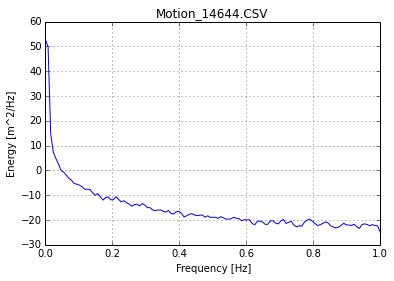

In [5]:
#Purisa Jasmine Simmons
#July 6, 2018
#An algorithm for generating a Power Spectral Density Plot from 
#accelerometer data that has been converted to displacement.

#Overview of Algorithm:
#1. Returns the Power Spectral Density Plot

#Data Units:
#acceleration is measured in g, 500a = 1g = -9.81m/s^2
#displacement measured in m
#time measured in seconds

%matplotlib inline

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

from plotly import tools
import plotly.offline
import plotly.graph_objs as go

import math
import re

#Need to do peak-picking before algorithm runs:
#1. Read through file, save all times and accelerations:
print('Running WaveStats Algorithm:')

#Reading data from filename_r
filename_r = "Motion_14644.CSV"
read_file = open(filename_r, "r")

#File that gets written to:
write_file = open("WaveStatsOut.txt", "w")

#Initialize lists
t1 = 0 
t2 = 0
time_e_list = []  #list of ***elapsed*** times
time_o_list = []  #list of ***offset*** times
acc_list = []     #list of estimated accelerations
disp_list = []    #list of estimated displacements

print 'Extracting data from file...'
with open(filename_r, 'r') as f: 
  for line in f:
    str_array = line.split(',')  #separates each line into an array on commas

    #-------Calculating Time Offset--------#
    if str_array[0] == "UTC":
      t1 = 0
      t2 = 0
      time_e_list.append(0)
      time_o_list.append(0)

    else:
      t2 = str_array[0]

      if (t2 != 0 and t1 != 0 and str_array[2] != "N/A"):
        time_regex = r"(\.\d+)"
        t2_val = float(re.search(time_regex, t2).group(1))
        t1_val = float(re.search(time_regex, t1).group(1))

        #print t2_val
        #print t1_val

        t_out = t2_val - t1_val #measured in secs

        #t_out is the time offset between two subsequent samples
        if (t_out < 0): 
          t_out = t_out + 1

        #print ("Printing time_offsets")
     
        last = len(time_e_list) - 1
        last_time = time_e_list[last] 
        new_time = t_out + last_time  #new_time is the total elapsed time

        time_e_list.append(new_time)
        time_o_list.append(t_out)

      if (str_array[2] != "N/A" and str_array[3] != "N/A" and \
        str_array[4] != "N/A" and str_array[2] != "IMU A1"):

        g_const = 512     #g_const is scaling constant: 500 (500raw units = 1g)
        gravity = -9.80665 #gravity is the constant 9.80665m^2/s 

        ax = int(str_array[2])  #x-axis (horizontal direction 1)
        #ax = (ax/g_const)*gravity
        ay = int(str_array[3])  #y-axis, affected by gravity (vertical)
        #ay = (ay/g_const)*gravity
        az = int(str_array[4])  #z-axis (horizontal direction 2)
        #az = (az/g_const)*gravity


        #Calculate the magnitude of acceleration from all three axes:
        a_mag = math.sqrt(ax**2 + ay**2 + az**2)

        #Double integrate aA to get approximate distance b/w wave trough and crest
        #aA = a_mag - gravity     #aA is the approximated vertical acceleration
        aA = (a_mag/g_const)*gravity - gravity

    
        #print aA

        acc_list.append(aA)


    #Reset t1 and t2 after t_out is calculated
    t1 = t2
    t2 = 0

#----------Here, after both lists created----------
len1 = len(time_e_list)
len2 = len(time_o_list)
len3 = len(acc_list)

if (len1 != len2 or len1 != len3):
  print("Error: Lengths of lists do not match!")
  print(len1)
  print(len2)
  print(len3)

else:
  #Initializations
  a0 = 0
  v0 = 0
  d0 = 0
  i = 0

  disp_list.append(0)

  #Calculations
  while (i < len1 - 1):
    t = time_o_list[i]
    a_new = acc_list[i]
    v_new = a_new*t + v0
    d_new = (0.5*a_new*(t**2)) + v_new*t + d0

    #print(d_new)

    last_di = len(disp_list) - 1      #index of last element in disp_list
    last_d = disp_list[last_di]       #last elem from disp_list
    total_d = d_new + last_d
    disp_list.append(total_d)

    #print(total_d)

    i = i + 1


len4 = len(disp_list)
if (len1 != len4):
  print("Error: Lengths of disp_list doesn't match!")
  print("Length of disp_list is: %d while len of acc_list is: %d")%(len(disp_list), len(acc_list))

#--------Here, after calculations, ready to graph---------

time_array = np.array(time_e_list)
disp_array = np.array(disp_list)
acc_array = np.array(acc_list)

#plt.plot(time_array, disp_array)
#plt.show()

#Need to remove the scaling factor of 500 to get more correct units for 
#Energy in m^2/Hz.

print('Finished computing the time_offset array.')
print('Finished computing the acc array.')

print('Algorithm Successful.')
x = disp_array 

##-----Version 1, scaling units wrong (10^3)------

f, Pxx_den = signal.periodogram(x, 100)
#plt.semilogy(f, Pxx_den)
#plt.xlabel('Frequency [Hz]')
#plt.ylabel('Energy [m^2Hz]')
#plt.show()

##---------Version 2, wrong axes titles, scaling off by 15------best

dt = 0.01
#plt.plot(time_array,acc_array)
plt.psd(x=disp_array)
plt.title(filename_r)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Energy [m^2/Hz]')
plt.show()

##------Version 3, not working?-----

#trace1 = go.Scatter(x=time_array, y=acc_array)
#trace2 = go.Scatter(x=f, y=Pxx_den)

#fig = tools.make_subplots(rows=2, cols=1)
#fig.append_trace(trace1, 2, 1)
#fig.append_trace(trace2, 1, 1)
#fig['layout'].update(height=600, width=600, title='Stacked subplots')
#plotly.offline.plot(fig, filename='stacked-subplots')

In [ ]:
#These graphs are being generated from displacement calculated from each point.
#Since this method always over-estimates our value for acceleration, the error in our 
#measurement for displacement accumulates over time. Instead of being a near-zero value,
#the graph for displacement looks like this:

Running WaveStats Algorithm:
Extracting data from file...


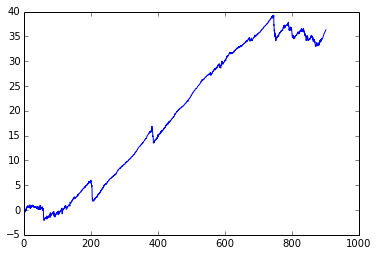

Finished computing the time_offset array.
Finished computing the acc array.
Algorithm Successful.


In [7]:
#Purisa Jasmine Simmons
#July 6, 2018
#An algorithm for generating a Power Spectral Density Plot from 
#accelerometer data that has been converted to displacement.

#Overview of Algorithm:
#1. Returns the Power Spectral Density Plot

#Data Units:
#acceleration is measured in g, 500a = 1g = -9.81m/s^2
#displacement measured in m
#time measured in seconds

%matplotlib inline

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

from plotly import tools
import plotly.offline
import plotly.graph_objs as go

import math
import re

#Need to do peak-picking before algorithm runs:
#1. Read through file, save all times and accelerations:
print('Running WaveStats Algorithm:')

#Reading data from filename_r
filename_r = "Motion_14637.CSV"
read_file = open(filename_r, "r")

#File that gets written to:
write_file = open("WaveStatsOut.txt", "w")

#Initialize lists
t1 = 0 
t2 = 0
time_e_list = []  #list of ***elapsed*** times
time_o_list = []  #list of ***offset*** times
acc_list = []     #list of estimated accelerations
disp_list = []    #list of estimated displacements

print 'Extracting data from file...'
with open(filename_r, 'r') as f: 
  for line in f:
    str_array = line.split(',')  #separates each line into an array on commas

    #-------Calculating Time Offset--------#
    if str_array[0] == "UTC":
      t1 = 0
      t2 = 0
      time_e_list.append(0)
      time_o_list.append(0)

    else:
      t2 = str_array[0]

      if (t2 != 0 and t1 != 0 and str_array[2] != "N/A"):
        time_regex = r"(\.\d+)"
        t2_val = float(re.search(time_regex, t2).group(1))
        t1_val = float(re.search(time_regex, t1).group(1))

        #print t2_val
        #print t1_val

        t_out = t2_val - t1_val #measured in secs

        #t_out is the time offset between two subsequent samples
        if (t_out < 0): 
          t_out = t_out + 1

        #print ("Printing time_offsets")
     
        last = len(time_e_list) - 1
        last_time = time_e_list[last] 
        new_time = t_out + last_time  #new_time is the total elapsed time

        time_e_list.append(new_time)
        time_o_list.append(t_out)

      if (str_array[2] != "N/A" and str_array[3] != "N/A" and \
        str_array[4] != "N/A" and str_array[2] != "IMU A1"):

        g_const = 512     #g_const is scaling constant: 500 (500raw units = 1g)
        gravity = -9.80665 #gravity is the constant 9.80665m^2/s 

        ax = int(str_array[2])  #x-axis (horizontal direction 1)
        #ax = (ax/g_const)*gravity
        ay = int(str_array[3])  #y-axis, affected by gravity (vertical)
        #ay = (ay/g_const)*gravity
        az = int(str_array[4])  #z-axis (horizontal direction 2)
        #az = (az/g_const)*gravity


        #Calculate the magnitude of acceleration from all three axes:
        a_mag = math.sqrt(ax**2 + ay**2 + az**2)

        #Double integrate aA to get approximate distance b/w wave trough and crest
        #aA = a_mag - gravity     #aA is the approximated vertical acceleration
        aA = (a_mag/g_const)*gravity - gravity

    
        #print aA

        acc_list.append(aA)


    #Reset t1 and t2 after t_out is calculated
    t1 = t2
    t2 = 0

#----------Here, after both lists created----------
len1 = len(time_e_list)
len2 = len(time_o_list)
len3 = len(acc_list)

if (len1 != len2 or len1 != len3):
  print("Error: Lengths of lists do not match!")
  print(len1)
  print(len2)
  print(len3)

else:
  #Initializations
  a0 = 0
  v0 = 0
  d0 = 0
  i = 0

  disp_list.append(0)

  #Calculations
  while (i < len1 - 1):
    t = time_o_list[i]
    a_new = acc_list[i]
    v_new = a_new*t + v0
    d_new = (0.5*a_new*(t**2)) + v_new*t + d0

    #print(d_new)

    last_di = len(disp_list) - 1      #index of last element in disp_list
    last_d = disp_list[last_di]       #last elem from disp_list
    total_d = d_new + last_d
    disp_list.append(total_d)

    #print(total_d)

    i = i + 1


len4 = len(disp_list)
if (len1 != len4):
  print("Error: Lengths of disp_list doesn't match!")
  print("Length of disp_list is: %d while len of acc_list is: %d")%(len(disp_list), len(acc_list))

#--------Here, after calculations, ready to graph---------

time_array = np.array(time_e_list)
disp_array = np.array(disp_list)
acc_array = np.array(acc_list)

plt.plot(time_array, disp_array)
plt.show()

#Need to remove the scaling factor of 500 to get more correct units for 
#Energy in m^2/Hz.

print('Finished computing the time_offset array.')
print('Finished computing the acc array.')

print('Algorithm Successful.')
x = disp_array 



Running WaveStats Algorithm:
Extracting data from file...


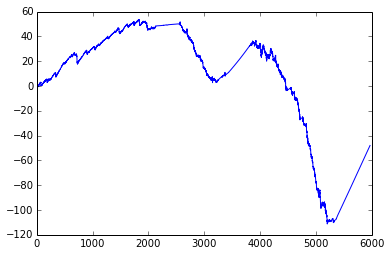

Finished computing the time_offset array.
Finished computing the acc array.
Algorithm Successful.


In [10]:
#Purisa Jasmine Simmons
#July 6, 2018
#An algorithm for generating a Power Spectral Density Plot from 
#accelerometer data that has been converted to displacement.

#Overview of Algorithm:
#1. Returns the Power Spectral Density Plot

#Data Units:
#acceleration is measured in g, 500a = 1g = -9.81m/s^2
#displacement measured in m
#time measured in seconds

%matplotlib inline

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

from plotly import tools
import plotly.offline
import plotly.graph_objs as go

import math
import re

#Need to do peak-picking before algorithm runs:
#1. Read through file, save all times and accelerations:
print('Running WaveStats Algorithm:')

#Reading data from filename_r
filename_r = "Motion_14644.CSV"
read_file = open(filename_r, "r")

#File that gets written to:
write_file = open("WaveStatsOut.txt", "w")

#Initialize lists
t1 = 0 
t2 = 0
time_e_list = []  #list of ***elapsed*** times
time_o_list = []  #list of ***offset*** times
acc_list = []     #list of estimated accelerations
disp_list = []    #list of estimated displacements

print 'Extracting data from file...'
with open(filename_r, 'r') as f: 
  for line in f:
    str_array = line.split(',')  #separates each line into an array on commas

    #-------Calculating Time Offset--------#
    if str_array[0] == "UTC":
      t1 = 0
      t2 = 0
      time_e_list.append(0)
      time_o_list.append(0)

    else:
      t2 = str_array[0]

      if (t2 != 0 and t1 != 0 and str_array[2] != "N/A"):
        time_regex = r"(\.\d+)"
        t2_val = float(re.search(time_regex, t2).group(1))
        t1_val = float(re.search(time_regex, t1).group(1))

        #print t2_val
        #print t1_val

        t_out = t2_val - t1_val #measured in secs

        #t_out is the time offset between two subsequent samples
        if (t_out < 0): 
          t_out = t_out + 1

        #print ("Printing time_offsets")
     
        last = len(time_e_list) - 1
        last_time = time_e_list[last] 
        new_time = t_out + last_time  #new_time is the total elapsed time

        time_e_list.append(new_time)
        time_o_list.append(t_out)

      if (str_array[2] != "N/A" and str_array[3] != "N/A" and \
        str_array[4] != "N/A" and str_array[2] != "IMU A1"):

        g_const = 512     #g_const is scaling constant: 500 (500raw units = 1g)
        gravity = -9.80665 #gravity is the constant 9.80665m^2/s 

        ax = int(str_array[2])  #x-axis (horizontal direction 1)
        #ax = (ax/g_const)*gravity
        ay = int(str_array[3])  #y-axis, affected by gravity (vertical)
        #ay = (ay/g_const)*gravity
        az = int(str_array[4])  #z-axis (horizontal direction 2)
        #az = (az/g_const)*gravity


        #Calculate the magnitude of acceleration from all three axes:
        a_mag = math.sqrt(ax**2 + ay**2 + az**2)

        #Double integrate aA to get approximate distance b/w wave trough and crest
        #aA = a_mag - gravity     #aA is the approximated vertical acceleration
        aA = (a_mag/g_const)*gravity - gravity

    
        #print aA

        acc_list.append(aA)


    #Reset t1 and t2 after t_out is calculated
    t1 = t2
    t2 = 0

#----------Here, after both lists created----------
len1 = len(time_e_list)
len2 = len(time_o_list)
len3 = len(acc_list)

if (len1 != len2 or len1 != len3):
  print("Error: Lengths of lists do not match!")
  print(len1)
  print(len2)
  print(len3)

else:
  #Initializations
  a0 = 0
  v0 = 0
  d0 = 0
  i = 0

  disp_list.append(0)

  #Calculations
  while (i < len1 - 1):
    t = time_o_list[i]
    a_new = acc_list[i]
    v_new = a_new*t + v0
    d_new = (0.5*a_new*(t**2)) + v_new*t + d0

    #print(d_new)

    last_di = len(disp_list) - 1      #index of last element in disp_list
    last_d = disp_list[last_di]       #last elem from disp_list
    total_d = d_new + last_d
    disp_list.append(total_d)

    #print(total_d)

    i = i + 1


len4 = len(disp_list)
if (len1 != len4):
  print("Error: Lengths of disp_list doesn't match!")
  print("Length of disp_list is: %d while len of acc_list is: %d")%(len(disp_list), len(acc_list))

#--------Here, after calculations, ready to graph---------

time_array = np.array(time_e_list)
disp_array = np.array(disp_list)
acc_array = np.array(acc_list)

plt.plot(time_array, disp_array)
plt.show()

#Need to remove the scaling factor of 500 to get more correct units for 
#Energy in m^2/Hz.

print('Finished computing the time_offset array.')
print('Finished computing the acc array.')

print('Algorithm Successful.')
x = disp_array 

